In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.stats.stats import pearsonr
import statsmodels.api as sm

import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
import plotly.figure_factory as ff
import cufflinks
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')

from collections import Counter

%config InlineBackend.figure_format = 'retina' #set 'png' here when working on notebook
%matplotlib inline


In [2]:
train = pd.read_csv("F:\jupyter notebook\wine-reviews\winemag-data_first150k.csv")
train.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [3]:
#缺失值
total = train.isnull().sum().sort_values(ascending=False)
percent =(train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
region_2,89977,0.596151
designation,45735,0.303021
region_1,25060,0.166037
price,13695,0.090737
province,5,0.000033
country,5,0.000033
winery,0,0.000000
variety,0,0.000000
points,0,0.000000
description,0,0.000000


In [4]:
#五值概阔
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,150930.0,75464.500000,43569.882402,0.0,37732.25,75464.5,113196.75,150929.0
points,150930.0,87.888418,3.222392,80.0,86.00,88.0,90.00,100.0
price,137235.0,33.131482,36.322536,4.0,16.00,24.0,40.00,2300.0


In [5]:
#标称值频数
table_cat = ff.create_table(train.describe(include=['O']).T, index=True, index_title='Categorical columns')
iplot(table_cat)

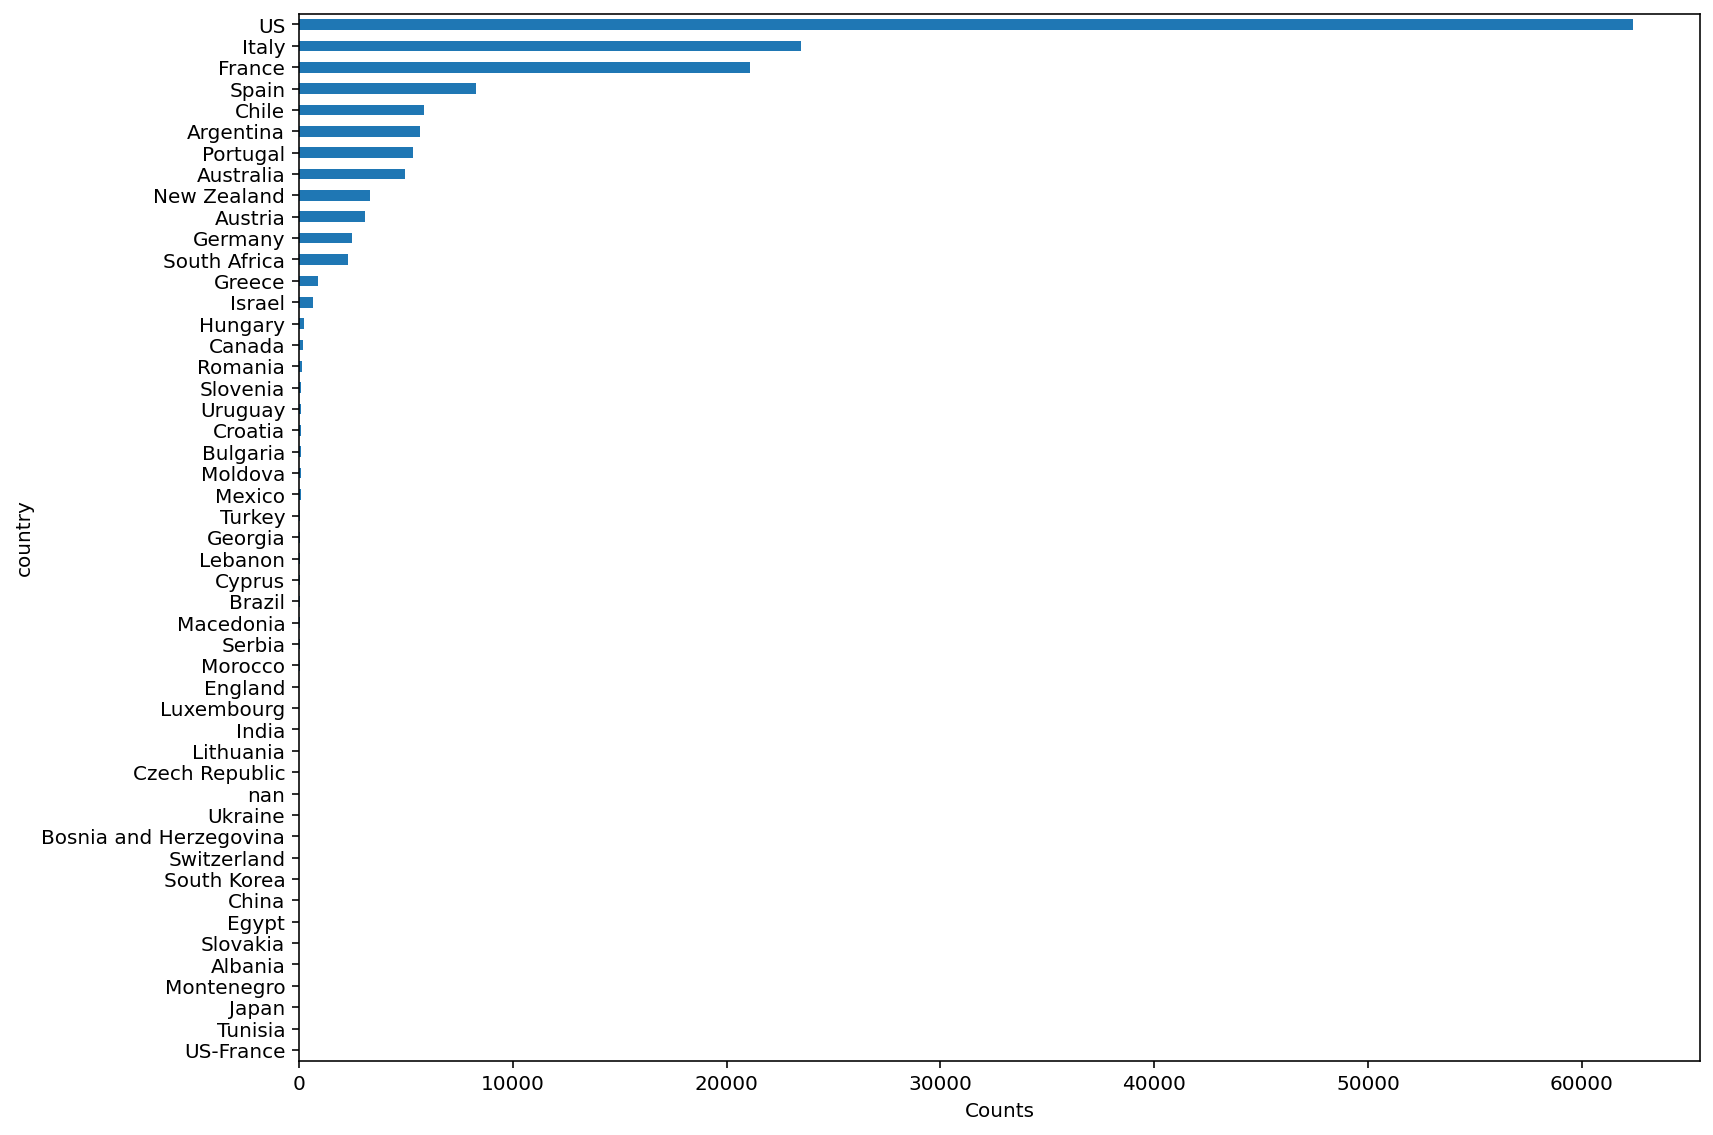

In [6]:

MIDSIZE = (12, 8)
fig, ax = plt.subplots(figsize=MIDSIZE)
train['country'].value_counts(dropna=False, ascending=True).plot(kind='barh', ax=ax)
ax.set_ylabel("country")
ax.set_xlabel("Counts")
fig.tight_layout()

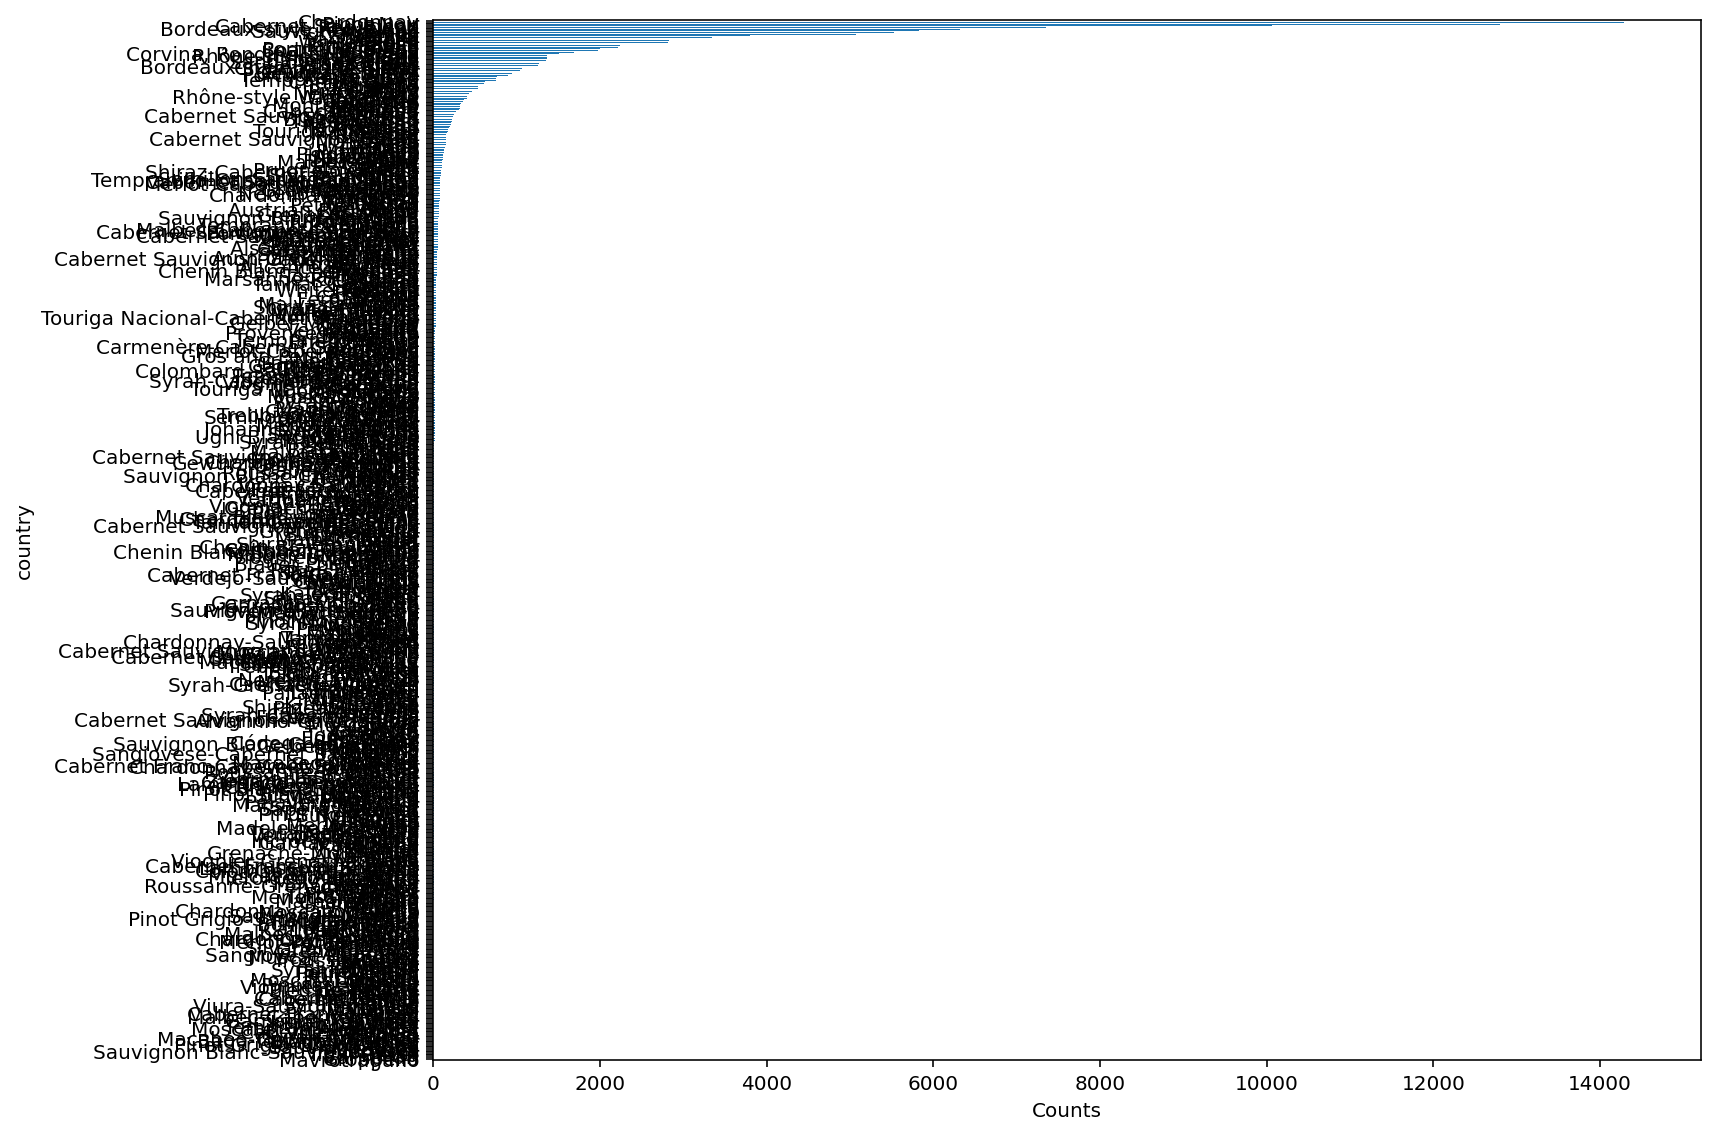

In [7]:

MIDSIZE = (12, 8)
fig, ax = plt.subplots(figsize=MIDSIZE)
train['variety'].value_counts(dropna=False, ascending=True).plot(kind='barh', ax=ax)
ax.set_ylabel("country")
ax.set_xlabel("Counts")
fig.tight_layout()

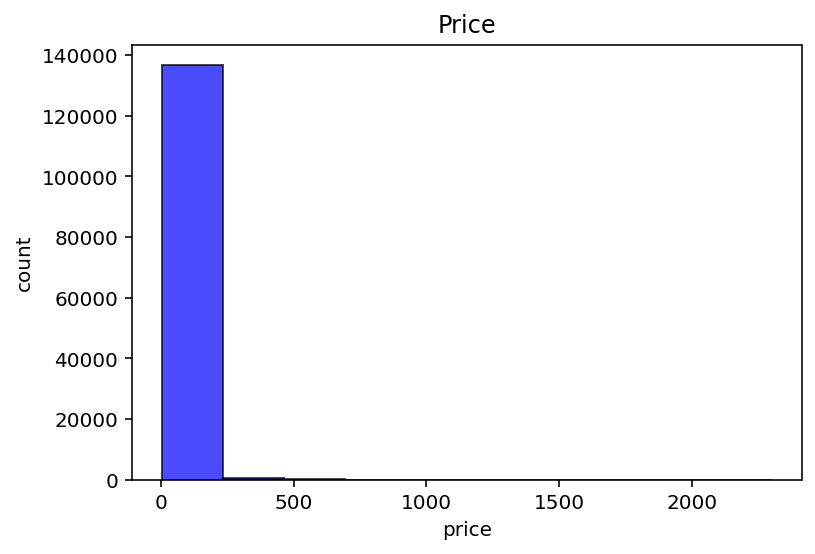

In [15]:
#销售价格直方图
plt.hist(train.price, bins=10,  facecolor="blue", edgecolor="black", alpha=0.7)
plt.xlabel("price")
plt.ylabel("count")
plt.title("Price")
plt.show()

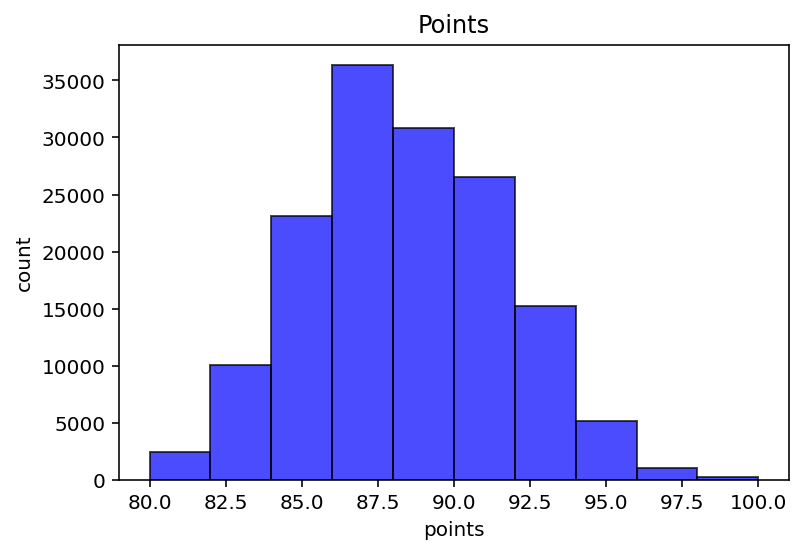

In [9]:
#红酒评分直方图
plt.hist(train.points, bins=10,  facecolor="blue", edgecolor="black", alpha=0.7)
plt.xlabel("points")
plt.ylabel("count")
plt.title("Points")
plt.show()

Text(0, 0.5, 'values of price')

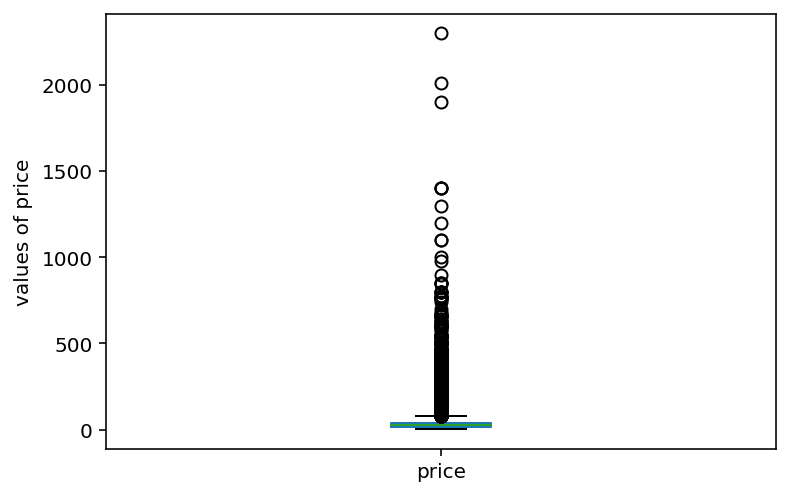

In [10]:
#价格箱线图
fig,axes = plt.subplots()
train['price'].plot(kind='box',ax=axes)
axes.set_ylabel('values of price')


Text(0, 0.5, 'points')

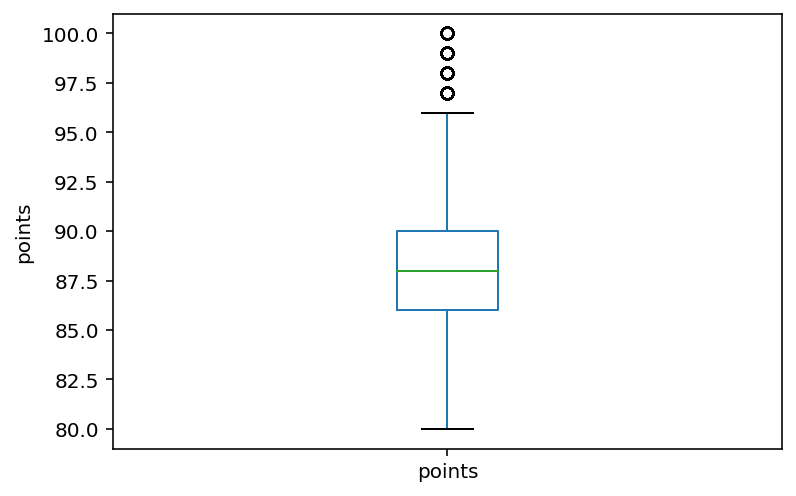

In [11]:
#评分箱线图
fig,axes = plt.subplots()
train['points'].plot(kind='box',ax=axes)
axes.set_ylabel('points')

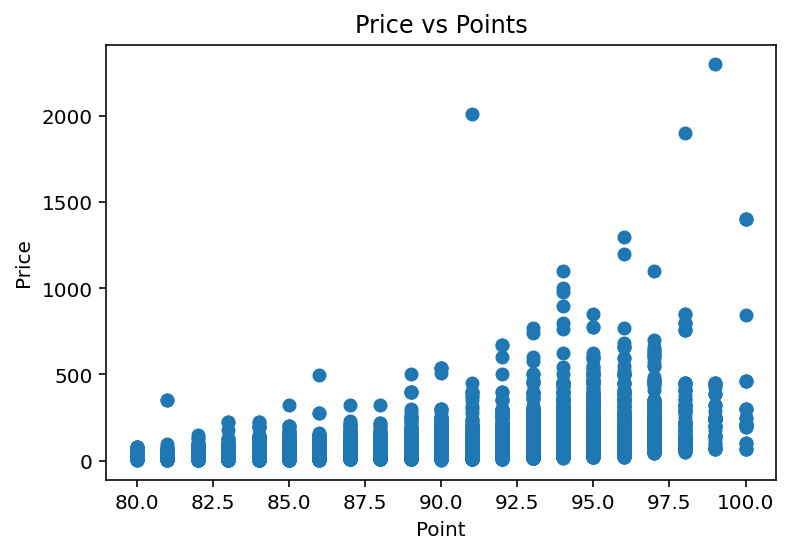

In [12]:
#价格与评分散点图
plt.scatter(train.points,train.price)

plt.title('Price vs Points')

plt.xlabel('Point')

plt.ylabel('Price')

plt.show()

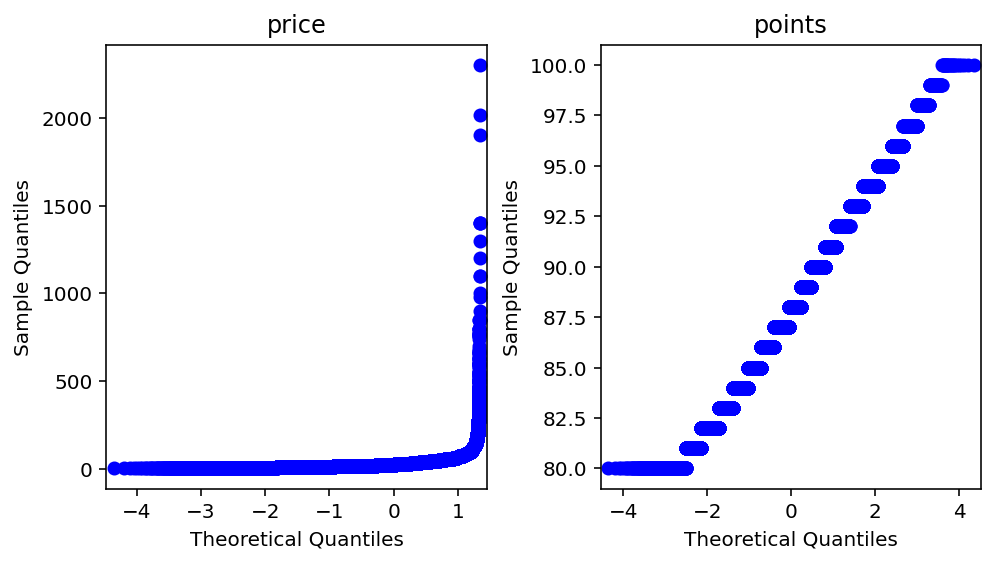

In [13]:
#qq图
fig =plt.figure(figsize=(30,20))
i=1
for item in ["price","points"]:
    ax=fig.add_subplot(4,7,i)
    sm.qqplot(train[item],ax=ax)
    ax.set_title(item)
    i+=1
plt.subplots_adjust(wspace=0.3,hspace=0.3)
plt.show()